In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [3]:
import pycomlink as pycml
import xarray as xr
import matplotlib.pyplot as plt

/Users/chwala-c/code/pycomlink/pycomlink/core/comlink.py:36: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  converter.register()


In [4]:
%%time
cml_list = pycml.io.read_from_cmlh5(
    '/Users/chwala-c/Dropbox/code/comlink/pycomlink_stuff/example_data/example_cml_with_R_for_Erik.h5')

388 CMLs read in
CPU times: user 6.99 s, sys: 592 ms, total: 7.58 s
Wall time: 9 s


In [5]:
ds_radolan = xr.open_dataset(
    '/pd/data/regclim_data/gridded_data/precipitation/RADOLAN/RADOLAN_RW/RADOLAN_RW_2016.nc')
# Trim date range to date range of CMLs
ds_radolan = ds_radolan.sel(time=slice(cml_list[0].channel_1.data.index[0],
                                       cml_list[0].channel_1.data.index[-1]))
ds_radolan

<xarray.Dataset>
Dimensions:          (time: 72, x: 900, y: 900)
Coordinates:
  * x                (x) float64 -523.5 -522.5 -521.5 -520.5 -519.5 -518.5 ...
  * y                (y) float64 -4.659e+03 -4.658e+03 -4.657e+03 -4.656e+03 ...
    latitudes        (y, x) float64 ...
    longitudes       (y, x) float64 ...
  * time             (time) datetime64[ns] 2016-11-05T00:50:00 ...
Data variables:
    rainfall_amount  (time, y, x) float32 ...
    radolan_grid     float64 ...
Attributes:
    title:        RADOLAN RW rainfall data
    source:       ftp://ftp-cdc.dwd.de/pub/CDC/grids_germany/hourly/radolan/
    institution:  DWD
    history:      Created at 2018-01-27 04:14:35.717004
    Conventions:  CF-1.6

In [6]:
validator = pycml.validation.validator.GridValidator(xr_ds=ds_radolan)

<IPython.core.display.Javascript object>


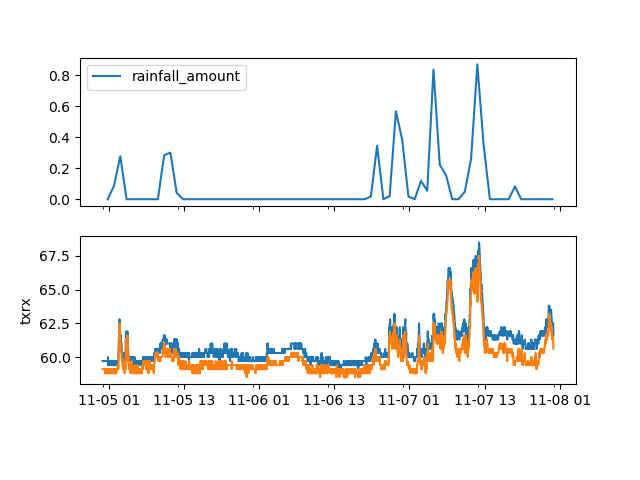

In [7]:
cml = cml_list[3]

df_radolan_at_cml = validator.get_time_series(cml, 'rainfall_amount')

fig, ax = plt.subplots(2, 1, sharex=True)
df_radolan_at_cml.plot(ax=ax[0])
cml.plot_data(['txrx'], ax=ax[1])

<IPython.core.display.Javascript object>


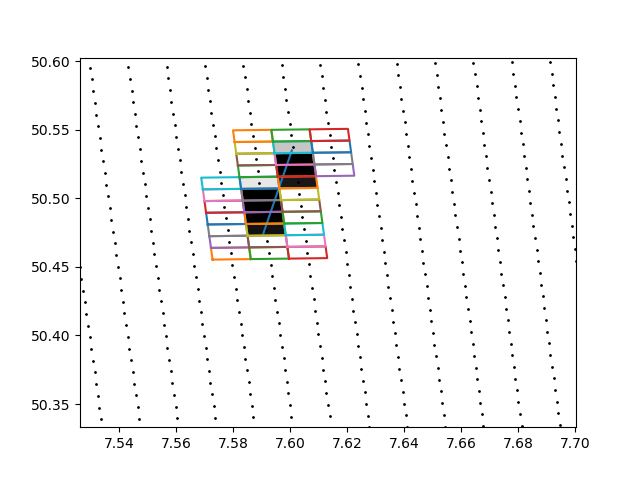

In [9]:
ax = validator.plot_intersections(cml_list[3])

In [10]:
validator.intersect_weights.sum()

0.99991040136702836